# Linear regression 

In this exercise you will use linear regression to predict flat prices. One more time, training will be handled via gradient descent. Although, contratry to the first exercise, we will now:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a different loss function.

Let's start with getting the data.

In [2]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2019-03-07 23:22:28--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.1, 2620:100:6026:1::a27d:4601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/zey0gx91pna8irj/mieszkania.csv [following]
--2019-03-07 23:22:28--  https://www.dropbox.com/s/dl/zey0gx91pna8irj/mieszkania.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4f96bcc5c21664d9c36a24aa24.dl.dropboxusercontent.com/cd/0/get/Acq-RQm-99GDaPaFaGrvPq__uodUE6oeX6e8b4-KYLHrsjGSWboqsmqW091TLSZcXy5FNzYrn9tOrRkTNf834vmjI1xOyf7hB1aht6HBFpdU_w/file?dl=1# [following]
--2019-03-07 23:22:28--  https://uc4f96bcc5c21664d9c36a24aa24.dl.dropboxusercontent.com/cd/0/get/Acq-RQm-99GDaPaFaGrvPq__uodUE6oeX6e8b4-KYLHrsjGSWboqsmqW091TLSZcXy5FNzYrn9tOrRkTNf834vmjI1xOyf7hB1aht6HBFpdU_w/file?dl=1
Res

In [3]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


**NOTES**

**Można dzielnicę zastąpić przez średnią innych dzielnic**

**twierdzenie o tym że многочлен степени н можно пустить идеально через n+1 точку**

**Średnia minimizuje błąd kwadratowy;Błąd logarytmiczny minimizuje mediana(?)**

Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilosc_sypialni,ilosc_lazienek,rok_budowy,parking_podziemny`). 

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

**Jedynka potrzebna, bo nie ma logarytmu od 0. Więc dodajemy jeden, żeby**

Let's start with implementing the loss function.

In [25]:
import pandas as pd
import numpy as np
Data = pd.read_csv('mieszkania.csv')

In [7]:
Data.head()

,m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
0,104,mokotowo,2,2,1940,1,780094
1,43,ochotowo,1,1,1970,1,346912
2,128,grodziskowo,3,2,1916,1,523466
3,112,mokotowo,3,2,1920,1,830965
4,149,mokotowo,3,3,1977,0,1090479


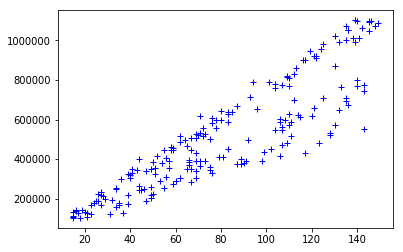

In [26]:
#TODO Wykres cen oraz m2 dla mieszkań
import matplotlib.pyplot as plt

plt.plot(Data['m2'],Data['cena'],'b+')



In [20]:
from math import log

In [42]:
from statistics import mean

def msle(ys, ps):
    assert len(ys) == len(ps)
    return np.mean([(log(1+y) - log(1+p)) ** 2 for y,p in list(zip(ys,ps))])

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [57]:
###################################################
# TODO: Compute msle for outputing the mean price #
###################################################
mean = np.mean(Data['cena'])
print("The MSLE with constant prediction(MEAN) is {:3.4f}".format(msle(list(Data['cena']),[mean for _ in range(len(Data['cena']) )])))

The MSLE with constant prediction(MEAN) is 0.3915


Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [58]:
median = np.median(Data['cena'])
print("The MSLE with another constant prediction(MEDIAN) is {:3.4f}".format(msle(list(Data['cena']),[median for _ in range(len(Data['cena']) )])))

The MSLE with another constant prediction(MEDIAN) is 0.3679


Now, let's implement a standard linear regression model. 

TypeError: 'NoneType' object is not iterable

In [ ]:
##########################################################
# TODO: Implement linear regression and compute its msle #
##########################################################
f = lambda x :

n_epochs = 100



Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint: 
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change the algorithm.
</sup></sub></sup></sub></sup></sub>

In [ ]:
#############################################
# TODO: Optimize msle and compare the error #
#############################################

Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code. 

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint: 
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2: 
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

In [ ]:
###############################################
# TODO: Implement the feature engieering part #
###############################################

In [ ]:
##############################################################
# TODO: Test your solution on the training and test datasets #
##############################################################